1. What is a Decision Tree, and how does it work?
It’s a tree-like model used for decision-making by splitting data based on features.

2. What are impurity measures in Decision Trees?
They measure how mixed the classes are (e.g., Gini Impurity, Entropy).

3. What is the mathematical formula for Gini impurity?
Gini = 1 − ∑(pi²), where pi is the probability of class i.

4. What is the mathematical formula for Entropy?
Entropy = − ∑(pi * log₂(pi)).

5. What is Information Gain, and how is it used in Decision Trees?
It is the reduction in entropy after a split; used to decide best split.

6. What is the difference between Gini impurity and Entropy?
Both measure impurity; Gini is faster, Entropy is more informative.

7. What is the mathematical explanation behind Decision Trees?
They use impurity (Gini/Entropy) and Information Gain to split nodes.

8. What is Pre-Pruning in Decision Trees?
It stops tree growth early based on criteria like depth or node size.

9. What is Post-Pruning in Decision Trees?
It removes branches from a fully grown tree to prevent overfitting.

10. What is the difference between Pre-Pruning and Post-Pruning?
Pre-pruning halts growth early; post-pruning trims a complete tree.

11. What is a Decision Tree Regressor?
It predicts continuous values by splitting data based on features.

12. What are the advantages and disadvantages of Decision Trees?
Easy to interpret, but prone to overfitting and sensitive to noise.

13. How does a Decision Tree handle missing values?
By using surrogate splits or skipping that data point.

14. How does a Decision Tree handle categorical features?
By splitting based on unique values of the categorical variable.

15. What are some real-world applications of Decision Trees?
Used in finance (credit scoring), healthcare (diagnosis), and marketing (customer targeting).

Q16 Accuracy: 1.0
Q17 Feature Importances (Gini): [0.         0.01911002 0.55727376 0.42361622]
Q18 Accuracy (Entropy): 1.0
Q19 MSE: 0.5346767838544574
Q21 Accuracy (max_depth=3): 1.0
Q21 Accuracy (full tree): 1.0
Q22 Accuracy (min_samples_split=5): 1.0
Q23 Accuracy with scaling: 1.0
Q24 Accuracy (OvR): 1.0
Q25 Feature Importance Scores: [0.03822004 0.         0.40445656 0.5573234 ]
Q26 MSE (max_depth=5): 0.5210801561811792
Q26 MSE (unrestricted): 0.5346767838544574
Q27 Accuracy (Post-Pruned): 0.7111111111111111
Q28 Precision: 1.0
Q28 Recall: 1.0
Q28 F1 Score: 1.0


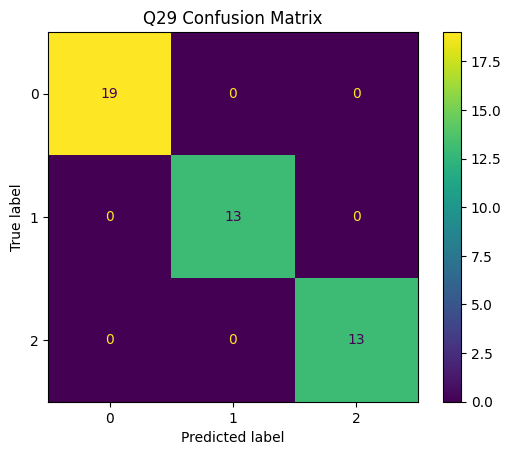

Q30 Best Params: {'criterion': 'gini', 'max_depth': 3}
Q30 Best Accuracy: 1.0


In [1]:
# Import required libraries
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import graphviz
from sklearn.tree import export_graphviz

# Load datasets
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# 16 - Basic Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Q16 Accuracy:", clf.score(X_test, y_test))

# 17 - Gini Impurity
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)
print("Q17 Feature Importances (Gini):", clf_gini.feature_importances_)

# 18 - Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)
print("Q18 Accuracy (Entropy):", clf_entropy.score(X_test, y_test))

# 19 - Decision Tree Regressor
housing = fetch_california_housing()
X_house, y_house = housing.data, housing.target
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_house, y_house, test_size=0.3, random_state=42)
reg = DecisionTreeRegressor()
reg.fit(Xh_train, yh_train)
yh_pred = reg.predict(Xh_test)
print("Q19 MSE:", mean_squared_error(yh_test, yh_pred))

# 20 - Visualization using graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")  # saves as iris_tree.pdf

# 21 - max_depth = 3 vs full
clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(X_train, y_train)
print("Q21 Accuracy (max_depth=3):", clf3.score(X_test, y_test))
print("Q21 Accuracy (full tree):", clf.score(X_test, y_test))

# 22 - min_samples_split = 5 vs default
clf_split5 = DecisionTreeClassifier(min_samples_split=5)
clf_split5.fit(X_train, y_train)
print("Q22 Accuracy (min_samples_split=5):", clf_split5.score(X_test, y_test))

# 23 - With and without feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y_iris, test_size=0.3, random_state=42)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
print("Q23 Accuracy with scaling:", clf_scaled.score(X_test_s, y_test_s))

# 24 - One-vs-Rest strategy
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(DecisionTreeClassifier())
ovr.fit(X_train, y_train)
print("Q24 Accuracy (OvR):", ovr.score(X_test, y_test))

# 25 - Display feature importance
print("Q25 Feature Importance Scores:", clf.feature_importances_)

# 26 - max_depth=5 vs unrestricted
reg5 = DecisionTreeRegressor(max_depth=5)
reg5.fit(Xh_train, yh_train)
print("Q26 MSE (max_depth=5):", mean_squared_error(yh_test, reg5.predict(Xh_test)))
print("Q26 MSE (unrestricted):", mean_squared_error(yh_test, reg.predict(Xh_test)))

# 27 - Cost Complexity Pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas[-2]
clf_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
clf_pruned.fit(X_train, y_train)
print("Q27 Accuracy (Post-Pruned):", clf_pruned.score(X_test, y_test))

# 28 - Evaluate Precision, Recall, F1-Score
y_pred = clf.predict(X_test)
print("Q28 Precision:", precision_score(y_test, y_pred, average='macro'))
print("Q28 Recall:", recall_score(y_test, y_pred, average='macro'))
print("Q28 F1 Score:", f1_score(y_test, y_pred, average='macro'))

# 29 - Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Q29 Confusion Matrix")
plt.show()

# 30 - GridSearchCV
param_grid = {'max_depth': [2, 3, 4, 5, None], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Q30 Best Params:", grid.best_params_)
print("Q30 Best Accuracy:", grid.score(X_test, y_test))
